# Principal Components Analysis (PCA) Examples

Updated January 15, 2021 by Michael Burkhardt <burkhardt.5@osu.edu>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import gridspec
from pylab import size
from skimage import data, io, color
from sklearn.datasets import load_iris, make_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=2, suppress=True)

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100

In [2]:
def explained_variance(pca_obj):
    l = len(pca_obj.explained_variance_ratio_)
    print('Total Variance explained by {} principal component{}: {:.2f}%'.format(
        l,
        's' if l > 1 else '',
        sum(pca_obj.explained_variance_ratio_) * 100.0
    ))

## 1. A two-dimensional example

In [3]:
# Generate some random data
x1, y1 = make_regression(n_samples=50, n_features=1, noise=15.0)

# Reshape into 2-dim array
M1 = np.array([x1.reshape(-1,), y1]).T

In [4]:
# Rescale so we can see that the error lines are perpendicular to the
# principal component
scaler = MinMaxScaler()
M1 = scaler.fit_transform(M1)

In [5]:
# Peek at the first three rows of data
# Note this is a Numpy ndarray, not a Pandas DataFrame
M1[:3]

array([[0.06, 0.06],
       [0.02, 0.12],
       [0.43, 0.18]])

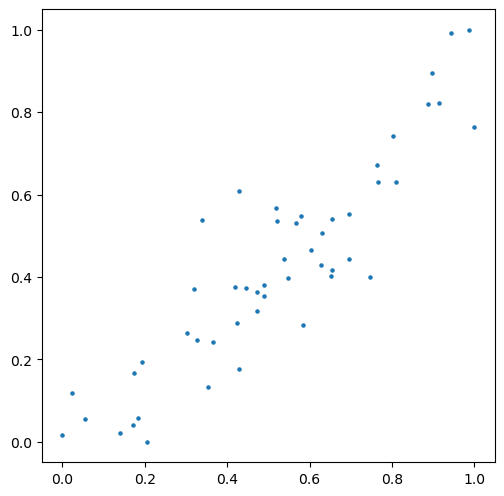

In [6]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, aspect=1.0)
ax.scatter(x=M1[:,0], y=M1[:,1], s=5)
plt.show()

In [7]:
# Create a PCA estimator (Scikit-Learn)
pca = PCA(n_components=1)

# Fit the estimator to the data in our matrix
pca.fit(M1)

PCA(n_components=1)

In [8]:
# project X, which is 2-dimensional onto a a new 1-dimensional array (L1)
# We now have a 1-dimensional representation of the original 2-d data!
L1 = pca.transform(M1)

In [9]:
# Reconstruct a 2-dimensional representation from the 1-dim reduced data
M1_reconstr = pca.inverse_transform(L1)

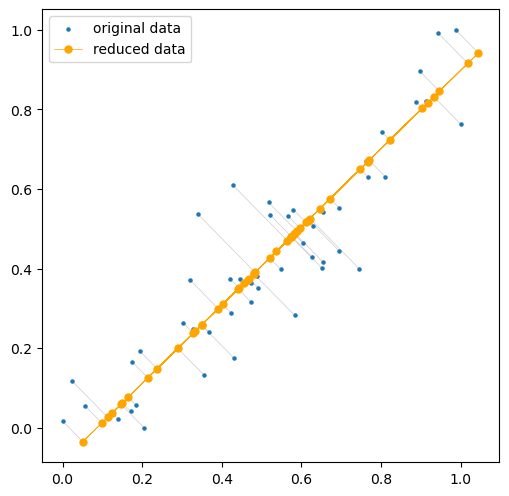

In [10]:
# Plot the original data, as well as the reduced data (orange)
fig = plt.figure()
ax1 = fig.add_subplot(111, aspect=1.0)
plt.scatter(x=M1[:,0], y=M1[:,1], s=5, label='original data') # original points
plt.plot(M1_reconstr[:,0], M1_reconstr[:,1], markersize=10, c='orange', marker='.', label='reduced data', lw=0.5)

# Draw connectors
for x1, y1, x2, y2 in zip(M1[:,0], M1[:,1], M1_reconstr[:,0], M1_reconstr[:,1]):
    ax1.plot([x1,x2], [y1,y2], color='#cccccc', lw=0.5, marker=None, zorder=-1.0)

plt.plot()
plt.legend()
plt.show()

## 2. Reducing a 5D dataset to 2D

Starting with a small 5-dimensional dataset, we'll examine the resulting
dimensionally reduced (2-dimensional) dataset. We'll also see how to reconstruct
(as best as possible) the original 5-dimensional dataset and compare the reconstruction
to the original.

In [11]:
# Randomly generate a 5×5 matrix of integers.
M2 = np.random.randint(1, 10, (5,5))
M2

array([[4, 2, 5, 3, 5],
       [4, 1, 8, 5, 5],
       [3, 9, 2, 2, 1],
       [9, 3, 1, 7, 5],
       [5, 3, 2, 3, 6]])

In [12]:
# Create a PCA estimator (Scikit-Learn), specifying 2 principal components
pca2 = PCA(n_components=2)

# Fit the estimator to the data in our matrix
pca2.fit(M2)

PCA(n_components=2)

In [13]:
explained_variance(pca2)

Total Variance explained by 2 principal components: 91.58%


In [14]:
# project X (5D) onto a lower (2D) dimensional matrix
L2 = pca2.fit_transform(M2)
L2

array([[-1.48, -1.91],
       [-3.98, -3.24],
       [ 7.03, -1.15],
       [-1.38,  5.42],
       [-0.18,  0.89]])

We now have a 2-dimensional representation that captures as much of the
information from the original matrix as possible.

In [15]:
# Reconstruct X from Y
M2_reconstr = pca2.inverse_transform(L2)
M2_reconstr

array([[4.08, 2.44, 5.46, 3.75, 4.77],
       [3.74, 0.53, 7.32, 4.02, 5.63],
       [2.84, 8.79, 1.64, 1.51, 1.4 ],
       [8.74, 2.75, 0.5 , 6.35, 5.62],
       [5.6 , 3.49, 3.08, 4.37, 4.58]])

In [16]:
# For reference, our original data matrix:
M2

array([[4, 2, 5, 3, 5],
       [4, 1, 8, 5, 5],
       [3, 9, 2, 2, 1],
       [9, 3, 1, 7, 5],
       [5, 3, 2, 3, 6]])

In [17]:
# Assess the "good-ness" of the reconstruction
M2_reconstr - M2

array([[ 0.08,  0.44,  0.46,  0.75, -0.23],
       [-0.26, -0.47, -0.68, -0.98,  0.63],
       [-0.16, -0.21, -0.36, -0.49,  0.4 ],
       [-0.26, -0.25, -0.5 , -0.65,  0.62],
       [ 0.6 ,  0.49,  1.08,  1.37, -1.42]])

## 3. Dimensionality reduction using the Iris dataset

In [18]:
# Load the Iris dataset using Scikit-Learn
IRIS = load_iris()
IRIS.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Let's start by trying one principal component

In [19]:
pca3 = PCA(n_components=1)
iris_fit = pca3.fit_transform(IRIS.data, IRIS.target)

In [20]:
explained_variance(pca3)

Total Variance explained by 1 principal component: 92.46%


In [21]:
# Put principal components into a Pandas DataFrame for
# easier plotting with Seaborn
df3 = pd.DataFrame(iris_fit, columns=['pc1'])
df3['y'] = 0
df3['class'] = IRIS.target
df3.sample(3)

,pc1,y,class
23,-2.302733,0,0
31,-2.409932,0,0
136,2.144243,0,2


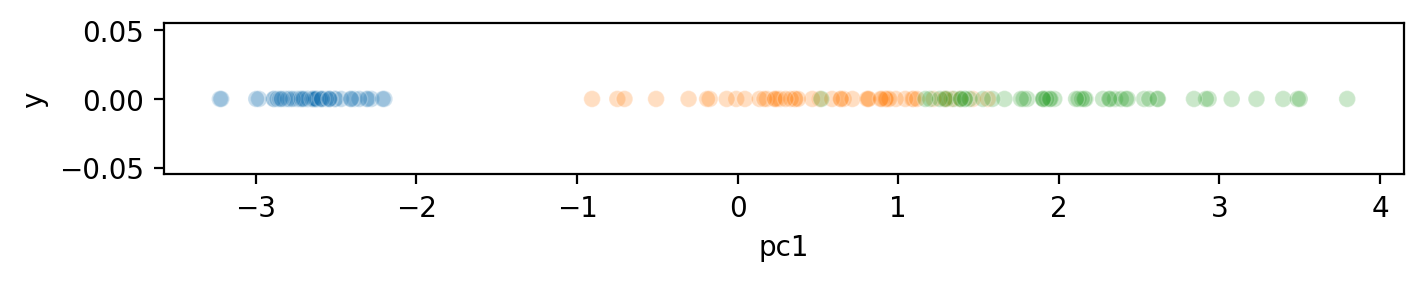

In [22]:
# Plot the classes - how well can we distinguish the classes using only one PC?
fig = plt.figure(figsize=(8,1), dpi=200)
ax = fig.add_subplot(111)
sns.scatterplot(data=df3, x="pc1", y='y', hue='class', alpha=0.25, ax=ax, palette='tab10')
ax.get_legend().remove()
plt.show()

So, we saw that one principal component explains 92% of the variance in
the original dataset. The plot shows that one principal component
distinguishes one of the classes, but there's still overlap between
the other two.

#### Now let's try two principal components

In [23]:
pca3 = PCA(n_components=2)
iris_fit = pca3.fit_transform(IRIS.data, IRIS.target)
explained_variance(pca3)

Total Variance explained by 2 principal components: 97.77%


In [24]:
# Put principal components into a Pandas DataFrame for
# easier plotting with Seaborn
df3b = pd.DataFrame(iris_fit, columns=['pc1', 'pc2'])
df3b['class'] = IRIS.target
df3b.sample(3)

,pc1,pc2,class
69,0.045227,-0.583834,1
130,2.841673,0.375269,2
29,-2.631989,-0.196961,0


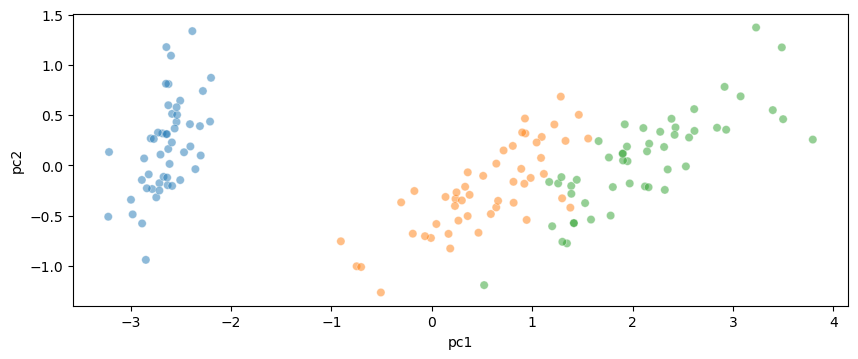

In [25]:
# Plot the classes - Is our ability to distinguish among the classes better now
# than with only one principal component?
fig = plt.figure()
ax = fig.add_subplot(111, aspect=1.0)
sns.scatterplot(data=df3b, x="pc1", y='pc2', hue='class', alpha=0.5, ax=ax, palette='tab10')
ax.get_legend().remove()
plt.show()

In [26]:
pca3.components_

array([[ 0.36, -0.08,  0.86,  0.36],
       [ 0.66,  0.73, -0.17, -0.08]])

## 4. PCA for image compression

In [27]:
!wget -nc -P .local_data https://github.com/mihobu/datasets/raw/main/images/5186.jpg

--2021-12-14 22:00:33--  https://github.com/mihobu/datasets/raw/main/images/5186.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mihobu/datasets/main/images/5186.jpg [following]
--2021-12-14 22:00:33--  https://raw.githubusercontent.com/mihobu/datasets/main/images/5186.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95587 (93K) [image/jpeg]
Saving to: '.local_data/5186.jpg'

5186.jpg            100%[===================>]  93.35K  --.-KB/s    in 0.02s   

2021-12-14 22:00:34 (5.78 MB/s) - '.local_data/5186.jpg' saved [95587/95587]



In [28]:
# Load the image as a dataset
img_gray = io.imread('.local_data/5186.jpg', as_gray=True)
img_gray.shape # (rows, columns)

(480, 640)

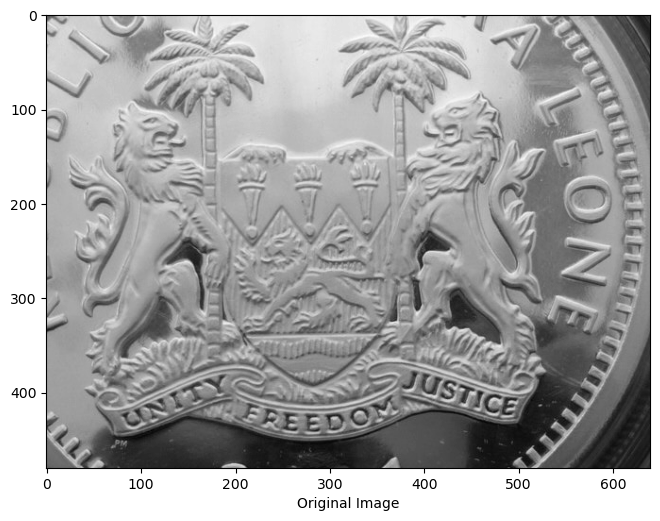

In [29]:
# Display the data (as an image)
plt.xlabel('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.show()

Note that although the image is represented by a 640x480 matrix, with each
cell equivalent to a pixel, we can also think of it as a dataset comprising 480 objects
in 640-dimensional space!

In [30]:
# Take a peek at this data. Each cell contains a numeric value
# representing the grayscale value (0 to 1) of one pixel.
img_gray

array([[0.46, 0.45, 0.42, ..., 0.24, 0.27, 0.32],
       [0.4 , 0.41, 0.39, ..., 0.24, 0.27, 0.29],
       [0.42, 0.42, 0.4 , ..., 0.25, 0.25, 0.28],
       ...,
       [0.4 , 0.4 , 0.4 , ..., 0.28, 0.25, 0.23],
       [0.43, 0.4 , 0.39, ..., 0.26, 0.24, 0.23],
       [0.46, 0.42, 0.38, ..., 0.25, 0.24, 0.24]])

In [31]:
# List of number of principal components we're going to try
n_comp = [128, 64, 32, 16, 8, 4]

In [32]:
N = len(n_comp)
fig = plt.figure(figsize=(12,20), dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=N, width_ratios=[1, 2])
for i in range(N):
    pca4 = PCA(n_components = n_comp[i])
    pca4.fit(img_gray)
    img_gray_pca = pca4.fit_transform(img_gray)
    img_gray_restored = pca4.inverse_transform(img_gray_pca)
    
    print('%d principal components' % (n_comp[i]))
    print(' * pc shape: %d x %d' % img_gray_pca.shape)
    print(' * Variance retained %.2f%%' % (sum(pca4.explained_variance_ratio_) * 100))
    print(' * Compression Ratio %.2f%%' % (float(size(img_gray_pca)) / size(img_gray) * 100))
    
    # left plot
    ax1 = fig.add_subplot(spec[2*i+0])
    ax1.imshow(img_gray_restored, cmap='gray')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel('%d principal components' % n_comp[i])

    # right plot
    ax2 = fig.add_subplot(spec[2*i+1])
    ax2.set_title('right')
    xlab = ['PC %s' % j for j in list(range(0, n_comp[i]))]
    x = list(range(0, n_comp[i]))
    y = pca4.explained_variance_ratio_
    ycum = y.cumsum()
    ax2.bar(x, y)
    ax2.plot(x, ycum, c='red', marker='o', ms=5)
    ax2.set_ylim((0, 1))
    ax2.set_xlabel('Principal Components')
    ax2.set_ylabel('Explained Variance')

plt.tight_layout(pad=4) 
plt.savefig('.local_data/result.png')
plt.close(fig) # use this to prevent figure from appearing in notebook

128 principal components
 * pc shape: 480 x 128
 * Variance retained 99.15%
 * Compression Ratio 20.00%
64 principal components
 * pc shape: 480 x 64
 * Variance retained 96.00%
 * Compression Ratio 10.00%
32 principal components
 * pc shape: 480 x 32
 * Variance retained 89.91%
 * Compression Ratio 5.00%
16 principal components
 * pc shape: 480 x 16
 * Variance retained 82.22%
 * Compression Ratio 2.50%
8 principal components
 * pc shape: 480 x 8
 * Variance retained 74.90%
 * Compression Ratio 1.25%
4 principal components
 * pc shape: 480 x 4
 * Variance retained 68.26%
 * Compression Ratio 0.62%


Now, take a look at [the saved figure](result.png) to compare the reconstructed images.